[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/NumEconNotebooks/master?urlpath=lab/tree/macro/OLG.ipynb)

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

import numecon.macro.OLG as OLG

# OLG Model

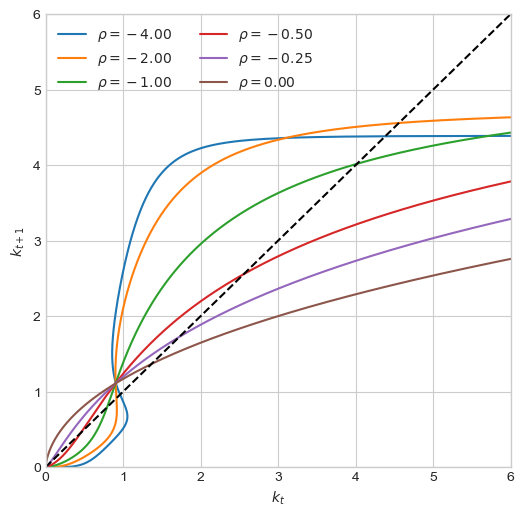

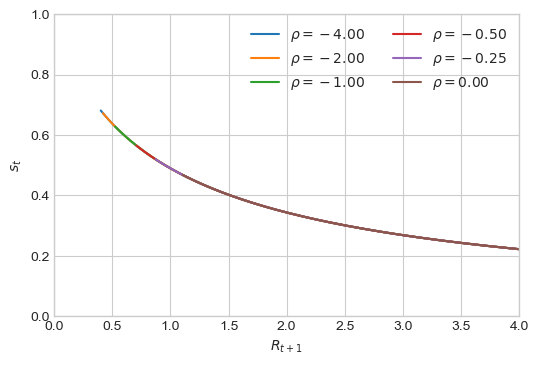

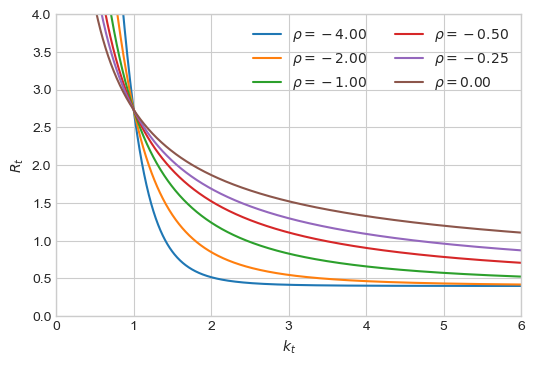

In [2]:
# 1. create figure
fig_trans = plt.figure(figsize=(6,6),dpi=100)
ax_trans = fig_trans.add_subplot(1,1,1)
    
fig_s = plt.figure(figsize=(6,4),dpi=100)
ax_s = fig_s.add_subplot(1,1,1)

fig_R = plt.figure(figsize=(6,4),dpi=100)
ax_R = fig_R.add_subplot(1,1,1)

# 2. loop over rho
for rho in [-4,-2,-1,-0.5,-0.25,0]:
    
    # a. setup model
    model = OLG.OLGModel(name='baseline',rho=rho)    
    
    # b. transition curve
    model.find_transition_curve()
    model.plot_transition_curve(ax_trans,label=f'$\\rho = {rho:7.2f}$')

    # c. interest rate function
    model.find_interest_rate_function()
    model.plot_interest_rate_function(ax_R,label=f'$\\rho = {rho:7.2f}$')
    
    # d. saving function
    model.find_saving_function()
    model.plot_saving_function(ax_s,label=f'$\\rho = {rho:7.2f}$')
    
# 3. figure details
model.plot_45(ax_trans)   
ax_trans.legend(loc='upper left',ncol=2)
ax_s.legend(loc='upper right',ncol=2)
ax_R.legend(loc='upper right',ncol=2)

# 4. print
fig_trans.savefig('figs/OLG_transition_curves.pdf')
fig_R.savefig('figs/OLG_interest_rate_functions.pdf')
fig_s.savefig('figs/OLG_saving_functions.pdf')
fig_trans.savefig('figs/OLG_transition_curves.png')
fig_R.savefig('figs/OLG_interest_rate_functions.png')
fig_s.savefig('figs/OLG_saving_functions.png')

# Simulation

baseline: k[50] = 4.4
       0: k[50] = 0.0
       1: k[50] = 0.0
       2: k[50] = 0.0
       3: k[50] = 4.4
       4: k[50] = 4.4


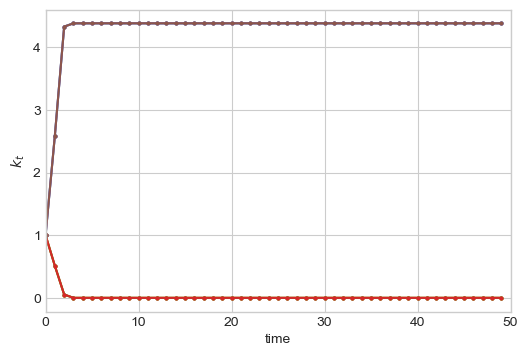

In [3]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

# a. setup
model = OLG.OLGModel(name='baseline',rho=-4)    

# b. find transition curve
model.find_transition_curve()
    
# c. simulate baseline
model.simulate()
model.plot_sim_k(ax)
print(f'baseline: k[{model.T}] = {model.sim_k[-1]:.2}')

# d. simulate alternate
for i in range(5):
    model.simulate(reset_seed=False)
    model.plot_sim_k(ax)
    print(f'{i:8d}: k[{model.T}] = {model.sim_k[-1]:.2}')

# Interactive interest rate function

In [4]:
OLG.interactive_interest_rate_function()

interactive(children=(FloatSlider(value=0.33, continuous_update=False, description='$\\alpha$', max=0.99, min=…

# Interactive saving function

In [5]:
OLG.interactive_saving_function()

interactive(children=(FloatSlider(value=0.7142857142857143, continuous_update=False, description='$\\beta$', m…

# Interactive saving function

In [6]:
OLG.interactive_transition_curve()

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='$\\sigma$', max=16.0, min=0…